# Pyddm
## &copy;  [Omkar Mehta](omehta2@illinois.edu) ##
### Industrial and Enterprise Systems Engineering, The Grainger College of Engineering,  UIUC ###

<hr style="border:2px solid blue"> </hr>


PyDDM can simulate models and generate artificial data, or it can fit them to data. Below are high-level overviews for how to accomplish each.

To simulate models and generate artificial data:

1. Optionally, define unique components of your model. Models are modular, and allow specifying a dynamic drift rate, noise level, diffusion bounds, starting position of the integrator, or post-simulation modifications to the RT histogram. Many common models for these are included by default, but for advance functionality you may need to subclass [Drift](https://pyddm.readthedocs.io/en/stable/apidoc/dependences.html#ddm.models.drift.Drift), [Noise](https://pyddm.readthedocs.io/en/stable/apidoc/dependences.html#ddm.models.noise.Noise), [Bound](https://pyddm.readthedocs.io/en/stable/apidoc/dependences.html#ddm.models.bound.Bound), [InitialCondition](https://pyddm.readthedocs.io/en/stable/apidoc/dependences.html#ddm.models.ic.InitialCondition), or [Overlay](https://pyddm.readthedocs.io/en/stable/apidoc/dependences.html#ddm.models.overlay.Overlay). These model components may depend on “conditions”, i.e. prespecified values associated with the behavioral task which change from trial to trial (e.g. stimulus coherence), or “parameters”, i.e. values which apply to all trials and should be fit to the subject.
2. Define a model. Models are represented by creating an instance of the [Model](https://pyddm.readthedocs.io/en/stable/apidoc/model.html#ddm.model.Model) class, and specifying the model components to use for it. These model component can [either be the model components included in PyDDM](https://pyddm.readthedocs.io/en/stable/apidoc/dependences.html) or ones you created in step 1. Values must be specified for all parameters required by model components.
3. Simulate the model using the [Model.solve()](https://pyddm.readthedocs.io/en/stable/apidoc/model.html#ddm.model.Model.solve) method to generate a [Solution](https://pyddm.readthedocs.io/en/stable/apidoc/model.html#ddm.solution.Solution) object. If you have multiple conditions, you must run [Model.solve()](https://pyddm.readthedocs.io/en/stable/apidoc/model.html#ddm.model.Model.solve) separately for each set of conditions and generate separate [Solution](https://pyddm.readthedocs.io/en/stable/apidoc/model.html#ddm.solution.Solution) objects.
4. Run the [Solution.resample()](https://pyddm.readthedocs.io/en/stable/apidoc/model.html#ddm.solution.Solution.resample) method of the [Solution](https://pyddm.readthedocs.io/en/stable/apidoc/model.html#ddm.solution.Solution) object to generate a [Sample](https://pyddm.readthedocs.io/en/stable/apidoc/model.html#ddm.sample.Sample). If you have multiple [Solution](https://pyddm.readthedocs.io/en/stable/apidoc/model.html#ddm.solution.Solution) objects (for multiple task conditions), you will need to generate multiple [Sample](https://pyddm.readthedocs.io/en/stable/apidoc/model.html#ddm.sample.Sample) objects as well. These can be added together with the “+” operator to form one single [Sample](https://pyddm.readthedocs.io/en/stable/apidoc/model.html#ddm.sample.Sample) object.

## Model with default conditions

**Drift is 0 and Noise is constant.**
```
> dx = 0.005
> T_dur = 2.
> dt = 0.005
> drift=DriftConstant(drift=0),
> noise=NoiseConstant(noise=1),
> bound=BoundConstant(B=1),
> IC=ICPointSourceCenter(),
> overlay=OverlayNone()
```

In [1]:
# !pip install scipy
# !pip install numpy
# !pip install pyddm
# !pip install matplotlib
# !pip install pandas
# !pip install paranoid-scientist
# !pip install pathos
# !pip install plotly

In [2]:
# libraries
from ddm import Model
from ddm.models import DriftConstant, NoiseConstant, BoundConstant, OverlayNonDecision, OverlayNone
from ddm.functions import fit_adjust_model, display_model

model = Model(name='Simple model',
              drift=DriftConstant(drift=2.0),  # https://github.com/mwshinn/PyDDM/blob/master/ddm/models/drift.py
              noise=NoiseConstant(noise=1.5),  # https://github.com/mwshinn/PyDDM/blob/master/ddm/models/noise.py
              bound=BoundConstant(B=1.1),  # https://github.com/mwshinn/PyDDM/blob/master/ddm/models/bound.py
              overlay=OverlayNone(),  # https://github.com/mwshinn/PyDDM/blob/master/ddm/models/overlay.py
              dx=.001, dt=.01, T_dur=2)


In [3]:
print(f'Number of timesteps is {2/0.01+1}')  # considers initial state
model.t_domain()
print(f"Shape of t_domain() is {model.t_domain().shape[0]}")
# print(f'Number of x_steps is {1.1/0.001+1}') since B=1.1
print(f'Number of x_steps is {model.x_domain(conditions={}).shape[0]}')

Number of timesteps is 201.0
Shape of t_domain() is 201
Number of x_steps is 2201


In [4]:
display_model(model)

Model Simple model information:
Drift component DriftConstant:
    constant
    Fixed parameters:
    - drift: 2.000000
Noise component NoiseConstant:
    constant
    Fixed parameters:
    - noise: 1.500000
Bound component BoundConstant:
    constant
    Fixed parameters:
    - B: 1.100000
IC component ICPointSourceCenter:
    point_source_center
    (No parameters)
Overlay component OverlayNone:
    No overlay
    (No parameters)



In [5]:
# # simulate_trial() simulates decision variable for a single trial. Uses Runge-Kutta by default.
# model.simulate_trial()

# simulated_solution() simulate individual trials (simulate_trial) 1000 times by default to yield a histogram.
# model.simulated_solution() 

In [6]:
# solve() solves the model using an analytical solution and returns a Solution object describing the joing PDF distrobution of reaction times
sol = model.solve(return_evolution=True)

# stores the pdf evolution of the reaction times. Returns x_domain by t_domain numpy error
pdf_evol = sol.pdf_evolution()
# print(f'Number of x_steps is {1.1/0.001+1}') since B=1.1
pdf_evol.shape
# returns the pdf of correct reaction times
# len(sol.pdf_corr())

# print(sol.corr)

# print('\n')

# print(sol.pdf_corr())

(2201, 201)

In [7]:
pdf_evol

array([[0.00000000e+00, 9.91081419e-07, 5.12110809e-06, ...,
        9.93100445e-07, 9.62504415e-07, 9.32851006e-07],
       [0.00000000e+00, 1.98401450e-06, 1.02516959e-05, ...,
        1.98796516e-06, 1.92671875e-06, 1.86735925e-06],
       [0.00000000e+00, 2.97889088e-06, 1.53921485e-05, ...,
        2.98459448e-06, 2.89264332e-06, 2.80352504e-06],
       ...,
       [0.00000000e+00, 2.09796214e-05, 1.08403248e-04, ...,
        2.10197905e-05, 2.03722003e-05, 1.97445614e-05],
       [0.00000000e+00, 1.39978061e-05, 7.23287313e-05, ...,
        1.40256792e-05, 1.35935677e-05, 1.31747690e-05],
       [0.00000000e+00, 7.00481298e-06, 3.61952144e-05, ...,
        7.01908315e-06, 6.80283505e-06, 6.59324926e-06]])

## Plot PDF evolution using Plotly


In [8]:
# import plotly.graph_objects as go
# import numpy as np
# z=pdf_evol
# sh_0, sh_1 = z.shape
# x, y = np.linspace(0, 2.2, sh_0), np.linspace(0, 2, sh_1)
# fig = go.Figure(data=[go.Surface(z=z.T, x=x, y=y)])

# fig.update_layout(title='PDF Evolution', autosize=False,
#                   width=500, height=500,
#                   margin=dict(l=65, r=50, b=65, t=90))

# fig.show()


## Wiener process/Brownian motion

A standard scalar [Wiener process](https://en.wikipedia.org/wiki/Wiener_process) is generated by the [stochastic differential equation](https://en.wikipedia.org/wiki/Stochastic_differential_equation).

$$
dX_{t} = dW_{t}
$$

Here the drift term is zero and the diffusion coefficient is 1/2. Thus the corresponding Fokker–Planck equation is
$$
\frac{\partial p(x,t)}{\partial t} = \frac{1}{2} \frac{\partial^2 p(x,t)}{{\partial x}^{2}}
$$

which is the simplest form of a diffusion equation. If the initial condition is $ {\displaystyle p(x,0)=\delta (x)}$, the solution is
$$
p(x,t) = \frac{1}{\sqrt {2\pi t}} e^{-x^2/(2t)}
$$

In [9]:
# libraries
from ddm import Model
from ddm.models import DriftConstant, NoiseConstant, BoundConstant, OverlayNonDecision
from ddm.functions import fit_adjust_model, display_model
from ddm.models import ICUniform, ICGaussian, ICArbitrary, ICRange, ICPointSourceCenter

# Weiner process with ICUniform
model = Model(name='Weiner Process',
              drift=DriftConstant(drift=0.0),  # https://github.com/mwshinn/PyDDM/blob/master/ddm/models/drift.py
              noise=NoiseConstant(noise=0.5),  # https://github.com/mwshinn/PyDDM/blob/master/ddm/models/noise.py
              IC = ICUniform(),
              bound=BoundConstant(B=2),  # https://github.com/mwshinn/PyDDM/blob/master/ddm/models/bound.py
              overlay=OverlayNone(),  # https://github.com/mwshinn/PyDDM/blob/master/ddm/models/overlay.py
              dx=.001, dt=.01, T_dur=10)

print(f'Number of timesteps is {10/0.01+1}')  # considers initial state
model.t_domain()
print(f"Shape of t_domain() is {model.t_domain().shape[0]}")
# print(f'Number of x_steps is {1.1/0.001+1}') since B=1.1
print(f'Number of x_steps is {model.x_domain(conditions={}).shape[0]}')

print(display_model(model))

# solve() solves the model using an analytical solution and returns a Solution object describing the joing PDF distrobution of reaction times
sol = model.solve(return_evolution=True)

# stores the pdf evolution of the reaction times. Returns x_domain by t_domain numpy error
pdf_evol = sol.pdf_evolution()

# import plotly.graph_objects as go
# import numpy as np
# z=pdf_evol
# sh_0, sh_1 = z.shape
# x, y = np.linspace(-5, 5, sh_0), np.linspace(0, 10, sh_1)
# fig = go.Figure(data=[go.Surface(z=z.T, x=x, y=y)])

# fig.update_layout(title='PDF Evolution for Weiner Process', autosize=False,
#                   width=500, height=500,
#                   margin=dict(l=65, r=50, b=65, t=90))

# fig.show()


Number of timesteps is 1001.0
Shape of t_domain() is 1001
Number of x_steps is 4001
Model Weiner Process information:
Drift component DriftConstant:
    constant
    Fixed parameters:
    - drift: 0.000000
Noise component NoiseConstant:
    constant
    Fixed parameters:
    - noise: 0.500000
Bound component BoundConstant:
    constant
    Fixed parameters:
    - B: 2.000000
IC component ICUniform:
    Uniform
    (No parameters)
Overlay component OverlayNone:
    No overlay
    (No parameters)

None


## Ornstein–Uhlenbeck process

The Ornstein–Uhlenbeck process ${\displaystyle x_{t}} $is defined by the following [stochastic differential equation](https://en.wikipedia.org/wiki/Stochastic_differential_equation):
$$
dx_{t} = -\theta dt + \sigma dW_{t}
$$

where ${\displaystyle \theta >0}$ and ${\displaystyle \sigma >0}$ are parameters and ${\displaystyle W_{t}}$ denotes the Wiener process

### OU-v1

> drift=DriftLinear(drift=0.0, t=0.2, x=0.1),  # https://github.com/mwshinn/PyDDM/blob/master/ddm/models/drift.py

> noise=NoiseConstant(noise=0.5),  # https://github.com/mwshinn/PyDDM/blob/master/ddm/models/noise.py

> IC = ICArbitrary(scipy.stats.binom.pmf(n=4000, p=0.4, k=range(0, 4001))),

> bound=BoundConstant(B=2),  # https://github.com/mwshinn/PyDDM/blob/master/ddm/models/bound.py

> overlay=OverlayNone(),  # https://github.com/mwshinn/PyDDM/blob/master/ddm/models/overlay.py

> dx=.001, dt=.01, T_dur=10


In [10]:
# libraries
from ddm import Model
from ddm.models import DriftConstant, NoiseConstant, BoundConstant, OverlayNonDecision, DriftLinear, OverlayNone
from ddm.functions import fit_adjust_model, display_model
from ddm.models import ICUniform, ICGaussian, ICArbitrary, ICRange, ICPointSourceCenter
import scipy.stats
# Weiner process with ICUniform
model = Model(name='OU Process',
              drift=DriftLinear(drift=0.0, t=0.2, x=0.1),  # https://github.com/mwshinn/PyDDM/blob/master/ddm/models/drift.py
              noise=NoiseConstant(noise=0.5),  # https://github.com/mwshinn/PyDDM/blob/master/ddm/models/noise.py
              IC = ICArbitrary(scipy.stats.binom.pmf(n=4000, p=0.4, k=range(0, 4001))),
              bound=BoundConstant(B=2),  # https://github.com/mwshinn/PyDDM/blob/master/ddm/models/bound.py
              overlay=OverlayNone(),  # https://github.com/mwshinn/PyDDM/blob/master/ddm/models/overlay.py
              dx=.001, dt=.01, T_dur=10)

print(f'Number of timesteps is {10/0.01+1}')  # considers initial state
model.t_domain()
print(f"Shape of t_domain() is {model.t_domain().shape[0]}")
# print(f'Number of x_steps is {1.1/0.001+1}') since B=1.1
print(f'Number of x_steps is {model.x_domain(conditions={}).shape[0]}')

print(display_model(model))

# solve() solves the model using an analytical solution and returns a Solution object describing the joing PDF distrobution of reaction times
sol = model.solve(return_evolution=True)

# stores the pdf evolution of the reaction times. Returns x_domain by t_domain numpy error
pdf_evol = sol.pdf_evolution()

# import plotly.graph_objects as go
# import numpy as np
# z=pdf_evol
# sh_0, sh_1 = z.shape
# x, y = np.linspace(-5, 5, sh_0), np.linspace(0, 10, sh_1)
# fig = go.Figure(data=[go.Surface(z=z.T, x=x, y=y)])

# fig.update_layout(title='PDF Evolution for OU Process', autosize=False,
#                   width=500, height=500,
#                   margin=dict(l=65, r=50, b=65, t=90))

# fig.show()


Number of timesteps is 1001.0
Shape of t_domain() is 1001
Number of x_steps is 4001
Model OU Process information:
Drift component DriftLinear:
    linear_xt
    Fixed parameters:
    - drift: 0.000000
    - x: 0.100000
    - t: 0.200000
Noise component NoiseConstant:
    constant
    Fixed parameters:
    - noise: 0.500000
Bound component BoundConstant:
    constant
    Fixed parameters:
    - B: 2.000000
IC component ICArbitrary:
    Arbitrary distribution
    (No parameters)
Overlay component OverlayNone:
    No overlay
    (No parameters)

None


# Get Median, IQR, Std, Mean
## Drift and Noise Models

### Leaky/Unstable Integrator

Leaky/unstable integrators are implemented in [DriftLinear](https://pyddm.readthedocs.io/en/stable/apidoc/dependences.html#ddm.models.drift.DriftLinear). For a leaky integrator, set the parameter x to be less than 0. For an unstable integrator, set the parameter x to be greater than 0. 

In [185]:
def get_median(array, axis = 0):
    return np.median(array, axis = axis)  #, keepdims=True)
def get_iqr(array, axis = 0):
    return scipy.stats.iqr(array, axis = axis)
def get_std(array, axis = 0):
    return np.std(array, axis = axis)
def get_mean(array, axis = 0):
    return np.mean(array, axis = axis)
def get_max(array, axis=0):
    return np.max(array, axis=axis)

In [261]:

class NoiseIncreasing(Noise):
    name = "Increasing Noise with time and space"
    required_parameters = ["noise", "t"]
    def get_noise(self, t, **kwargs):
        import numpy
        return (self.noise + self.t * t)* np.random.uniform(0.5, 1)
class DriftIncreasing(Drift):
    name = "Increasing Drift with time and space"
    required_parameters = ["drift", "x", "t"]
    def get_drift(self, x, t, **kwargs):
        import random
        return (self.drift + self.t*t + self.x * x) * random.randrange(-2, 2)
        

In [269]:
# libraries
from ddm import Model
from ddm.models import DriftConstant, NoiseConstant, BoundConstant, OverlayNonDecision, DriftLinear, Noise
from ddm.functions import fit_adjust_model, display_model
from ddm.models import ICUniform, ICGaussian, ICArbitrary, ICRange, ICPointSourceCenter
import scipy.stats
import numpy as np

dx = .001
dt = 0.01
T_dur = 10
B = 2

# initial condition
x = np.arange(0, 4.001, dx)
dist = (scipy.stats.norm.pdf(x, 0.5, 0.3)[:-1]/sum(scipy.stats.norm.pdf(x, 0.5, 0.3)[:-1]))
# Weiner process with ICUniform
model = Model(name='OU Process',
              drift=DriftIncreasing(drift=0., t=0.14, x = 0.16),  # https://github.com/mwshinn/PyDDM/blob/master/ddm/models/drift.py
              noise=NoiseIncreasing(noise=0.63, t=0.01),  # https://github.com/mwshinn/PyDDM/blob/master/ddm/models/noise.py
              IC = ICArbitrary(dist=dist),
              bound=BoundConstant(B=B),  # https://github.com/mwshinn/PyDDM/blob/master/ddm/models/bound.py
              overlay=OverlayNone(),  # https://github.com/mwshinn/PyDDM/blob/master/ddm/models/overlay.py
              dx=dx, dt=dt, T_dur=T_dur)

print(f'Number of timesteps is {10/dt+1}')  # considers initial state
model.t_domain()
print(f"Shape of t_domain() is {model.t_domain().shape[0]}")
# print(f'Number of x_steps is {1.1/0.001+1}') since B=1.1
print(f'Number of x_steps is {model.x_domain(conditions={}).shape[0]}')

print(display_model(model))

# solve() solves the model using an analytical solution and returns a Solution object describing the joing PDF distrobution of reaction times
sol = model.solve(return_evolution=True)

# stores the pdf evolution of the reaction times. Returns x_domain by t_domain numpy error
pdf_evol = sol.pdf_evolution()

# import plotly.graph_objects as go
# import numpy as np
# z=pdf_evol
# sh_0, sh_1 = z.shape
# x, t = np.linspace(-5, 5, sh_0), np.linspace(0, 10, sh_1)
# fig = go.Figure(data=[go.Surface(z=z.T, x=x, y=t)])

# fig.update_layout(title=f'PDF Evolution for OU Process', autosize=False,
#                   width=500, height=500,
#                   margin=dict(l=65, r=50, b=65, t=90))

# fig.show()


Number of timesteps is 1001.0
Shape of t_domain() is 1001
Number of x_steps is 4001
Model OU Process information:
Drift component DriftIncreasing:
    Increasing Drift with time and space
    Fixed parameters:
    - drift: 0.000000
    - x: 0.160000
    - t: 0.140000
Noise component NoiseIncreasing:
    Increasing Noise with time and space
    Fixed parameters:
    - noise: 0.630000
    - t: 0.010000
Bound component BoundConstant:
    constant
    Fixed parameters:
    - B: 2.000000
IC component ICArbitrary:
    Arbitrary distribution
    (No parameters)
Overlay component OverlayNone:
    No overlay
    (No parameters)

None


In [270]:
dist.shape

(4001,)

   t_domain    median       iqr       std      mean       max
0      0.00  0.000005  0.348172  0.440764  0.249938  1.396306
1      0.01  0.000006  0.298251  0.438067  0.247236  1.385093
2      0.02  0.000010  0.286684  0.433779  0.244867  1.368396
3      0.03  0.000011  0.284911  0.432274  0.244121  1.362619
4      0.04  0.000013  0.283987  0.430094  0.243268  1.353708


<AxesSubplot:xlabel='t_domain'>

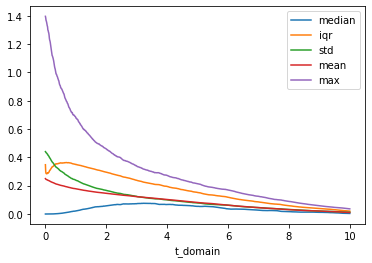

In [271]:
pdf_median = get_median(pdf_evol)
pdf_iqr = get_iqr(pdf_evol)
pdf_std = get_std(pdf_evol)
pdf_mean = get_mean(pdf_evol)
pdf_max = get_max(pdf_evol)
import seaborn as sns
import pandas as pd
t_domain = np.arange(0, T_dur+dt, dt)
data = {
    't_domain': t_domain,
    'median': pdf_median,
    'iqr': pdf_iqr,
    'std': pdf_std,
    'mean': pdf_mean,
    'max': pdf_max
}

data_df = pd.DataFrame(data)
print(data_df.head())
data_df.set_index('t_domain').plot()

<AxesSubplot:>

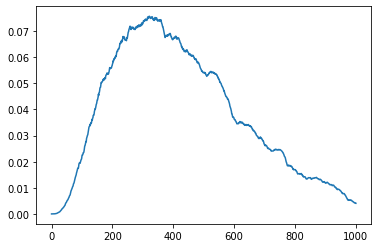

In [272]:
data_df['median'].plot()

In [195]:
model

Model(name='OU Process', drift=DriftIncreasing(drift=-0.05, x=0.002, t=0.004), noise=NoiseIncreasing(noise=0.063, x=0.1), bound=BoundConstant(B=2), IC=ICArbitrary(), overlay=OverlayNone(), dx=0.001, dt=0.01, T_dur=10)

# Get drift from data

We will be using [Simulating Stock Prices in Python using Geometric Brownian motion](https://towardsdatascience.com/simulating-stock-prices-in-python-using-geometric-brownian-motion-8dfd6e8c6b18) as reference.

Content:
1. What GBM does
2. What input parameters we need for GBM simulation
3. The components of GBM: Drift and Diffusion
4. Building the discrete-time GBM model
5. Making predictions

```
# Parameter Definitions

# So    :   initial stock price
# dt    :   time increment -> a day in our case
# T     :   length of the prediction time horizon(how many time points to predict, same unit with dt(days))
# N     :   number of time points in the prediction time horizon -> T/dt
# t     :   array for time points in the prediction time horizon [1, 2, 3, .. , N]
# mu    :   mean of historical daily returns
# sigma :   standard deviation of historical daily returns
# b     :   array for brownian increments
# W     :   array for brownian path
```

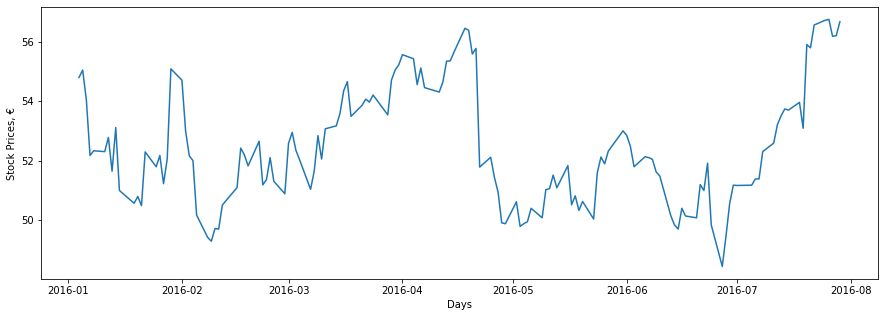

In [2]:
# 1. What GBM does
import pandas as pd
import numpy as np
import quandl
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# Plot of E.ON(a big scale energy company in Europe) 
# stock prices since beginning of 2019 (up to July)

prices = quandl.get("EOD/MSFT", 
                authtoken="pNHLvptFyzyj8UHDrces", 
                start_date = '2016-01-01', end_date = '2016-07-31'
                ).reset_index(drop = False)[['Date', 'Close']]
# prices               
plt.figure(figsize = (15, 5))
plt.plot(prices['Date'], prices['Close'])
plt.xlabel('Days')
plt.ylabel('Stock Prices, €')
plt.show()



In [6]:
prices.head()

,Date,Close
0,2016-01-04,54.80
1,2016-01-05,55.05
2,2016-01-06,54.05
3,2016-01-07,52.17
4,2016-01-08,52.33


## Fit RNN, LSTM and GRU for Max data



In [243]:
data_df.head()

,t_domain,median,iqr,std,mean,max
0,0.00,0.255409,0.026809,0.015876,0.249938,0.265846
1,0.01,0.251942,0.028669,0.039567,0.239758,0.265933
2,0.02,0.250909,0.029800,0.048021,0.234842,0.266014
3,0.03,0.250172,0.030885,0.053078,0.231253,0.266098
4,0.04,0.249573,0.032421,0.056718,0.228327,0.266186


In [ ]:
# install libraries
import torch
import torch.nn as nn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"{device}" " is available.")

In [ ]:
def generate_time_lags(df, n_lags):
    df_n = df.copy()
    for n in range(1, n_lags + 1):
        df_n[f"lag{n}"] = df_n["value"].shift(n)
    df_n = df_n.iloc[n_lags:]
    return df_n
    
input_dim = 100

df_timelags = generate_time_lags(df, input_dim)
df_timelags

# Splitting the data into train, validation, and test sets
from sklearn.model_selection import train_test_split

def feature_label_split(df, target_col):
    y = df[[target_col]]
    X = df.drop(columns=[target_col])
    return X, y

def train_val_test_split(df, target_col, test_ratio):
    val_ratio = test_ratio / (1 - test_ratio)
    X, y = feature_label_split(df, target_col)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_ratio, shuffle=False)
    X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=val_ratio, shuffle=False)
    return X_train, X_val, X_test, y_train, y_val, y_test

X_train, X_val, X_test, y_train, y_val, y_test = train_val_test_split(df_features, 'value', 0.2)

# Applying scale transformation
from sklearn.preprocessing import MinMaxScaler, StandardScaler, MaxAbsScaler, RobustScaler

def get_scaler(scaler):
    scalers = {
        "minmax": MinMaxScaler,
        "standard": StandardScaler,
        "maxabs": MaxAbsScaler,
        "robust": RobustScaler,
    }
    return scalers.get(scaler.lower())()
    
scaler = get_scaler('robust')
X_train_arr = scaler.fit_transform(X_train)
X_val_arr = scaler.transform(X_val)
X_test_arr = scaler.transform(X_test)

y_train_arr = scaler.fit_transform(y_train)
y_val_arr = scaler.transform(y_val)
y_test_arr = scaler.transform(y_test)

# Loading the datasets into DataLoaders
from torch.utils.data import TensorDataset, DataLoader

batch_size = 64

train_features = torch.Tensor(X_train_arr)
train_targets = torch.Tensor(y_train_arr)
val_features = torch.Tensor(X_val_arr)
val_targets = torch.Tensor(y_val_arr)
test_features = torch.Tensor(X_test_arr)
test_targets = torch.Tensor(y_test_arr)

train = TensorDataset(train_features, train_targets)
val = TensorDataset(val_features, val_targets)
test = TensorDataset(test_features, test_targets)

train_loader = DataLoader(train, batch_size=batch_size, shuffle=False, drop_last=True)
val_loader = DataLoader(val, batch_size=batch_size, shuffle=False, drop_last=True)
test_loader = DataLoader(test, batch_size=batch_size, shuffle=False, drop_last=True)
test_loader_one = DataLoader(test, batch_size=1, shuffle=False, drop_last=True)

In [ ]:
# Building Recurrent Neural Networks (RNN)
class RNNModel(nn.Module):
    def __init__(self, input_dim, hidden_dim, layer_dim, output_dim, dropout_prob):
        """The __init__ method that initiates an RNN instance.

        Args:
            input_dim (int): The number of nodes in the input layer
            hidden_dim (int): The number of nodes in each layer
            layer_dim (int): The number of layers in the network
            output_dim (int): The number of nodes in the output layer
            dropout_prob (float): The probability of nodes being dropped out

        """
        super(RNNModel, self).__init__()

        # Defining the number of layers and the nodes in each layer
        self.hidden_dim = hidden_dim
        self.layer_dim = layer_dim

        # RNN layers
        self.rnn = nn.RNN(
            input_dim, hidden_dim, layer_dim, batch_first=True, dropout=dropout_prob
        )
        # Fully connected layer
        self.fc = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        """The forward method takes input tensor x and does forward propagation

        Args:
            x (torch.Tensor): The input tensor of the shape (batch size, sequence length, input_dim)

        Returns:
            torch.Tensor: The output tensor of the shape (batch size, output_dim)

        """
        # Initializing hidden state for first input with zeros
        h0 = torch.zeros(self.layer_dim, x.size(0), self.hidden_dim).requires_grad_()

        # Forward propagation by passing in the input and hidden state into the model
        out, h0 = self.rnn(x, h0.detach())

        # Reshaping the outputs in the shape of (batch_size, seq_length, hidden_size)
        # so that it can fit into the fully connected layer
        out = out[:, -1, :]

        # Convert the final state to our desired output shape (batch_size, output_dim)
        out = self.fc(out)
        return out

In [ ]:
# Long Short-Term Memory (LSTM)
class LSTMModel(nn.Module):
    """LSTMModel class extends nn.Module class and works as a constructor for LSTMs.

       LSTMModel class initiates a LSTM module based on PyTorch's nn.Module class.
       It has only two methods, namely init() and forward(). While the init()
       method initiates the model with the given input parameters, the forward()
       method defines how the forward propagation needs to be calculated.
       Since PyTorch automatically defines back propagation, there is no need
       to define back propagation method.

       Attributes:
           hidden_dim (int): The number of nodes in each layer
           layer_dim (str): The number of layers in the network
           lstm (nn.LSTM): The LSTM model constructed with the input parameters.
           fc (nn.Linear): The fully connected layer to convert the final state
                           of LSTMs to our desired output shape.

    """
    def __init__(self, input_dim, hidden_dim, layer_dim, output_dim, dropout_prob):
        """The __init__ method that initiates a LSTM instance.

        Args:
            input_dim (int): The number of nodes in the input layer
            hidden_dim (int): The number of nodes in each layer
            layer_dim (int): The number of layers in the network
            output_dim (int): The number of nodes in the output layer
            dropout_prob (float): The probability of nodes being dropped out

        """
        super(LSTMModel, self).__init__()

        # Defining the number of layers and the nodes in each layer
        self.hidden_dim = hidden_dim
        self.layer_dim = layer_dim

        # LSTM layers
        self.lstm = nn.LSTM(
            input_dim, hidden_dim, layer_dim, batch_first=True, dropout=dropout_prob
        )

        # Fully connected layer
        self.fc = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        """The forward method takes input tensor x and does forward propagation

        Args:
            x (torch.Tensor): The input tensor of the shape (batch size, sequence length, input_dim)

        Returns:
            torch.Tensor: The output tensor of the shape (batch size, output_dim)

        """
        # Initializing hidden state for first input with zeros
        h0 = torch.zeros(self.layer_dim, x.size(0), self.hidden_dim).requires_grad_()

        # Initializing cell state for first input with zeros
        c0 = torch.zeros(self.layer_dim, x.size(0), self.hidden_dim).requires_grad_()

        # We need to detach as we are doing truncated backpropagation through time (BPTT)
        # If we don't, we'll backprop all the way to the start even after going through another batch
        # Forward propagation by passing in the input, hidden state, and cell state into the model
        out, (hn, cn) = self.lstm(x, (h0.detach(), c0.detach()))

        # Reshaping the outputs in the shape of (batch_size, seq_length, hidden_size)
        # so that it can fit into the fully connected layer
        out = out[:, -1, :]

        # Convert the final state to our desired output shape (batch_size, output_dim)
        out = self.fc(out)

        return out

In [ ]:
# Gated Recurrent Unit (GRU)
class GRUModel(nn.Module):
    """GRUModel class extends nn.Module class and works as a constructor for GRUs.

       GRUModel class initiates a GRU module based on PyTorch's nn.Module class.
       It has only two methods, namely init() and forward(). While the init()
       method initiates the model with the given input parameters, the forward()
       method defines how the forward propagation needs to be calculated.
       Since PyTorch automatically defines back propagation, there is no need
       to define back propagation method.

       Attributes:
           hidden_dim (int): The number of nodes in each layer
           layer_dim (str): The number of layers in the network
           gru (nn.GRU): The GRU model constructed with the input parameters.
           fc (nn.Linear): The fully connected layer to convert the final state
                           of GRUs to our desired output shape.

    """
    def __init__(self, input_dim, hidden_dim, layer_dim, output_dim, dropout_prob):
        """The __init__ method that initiates a GRU instance.

        Args:
            input_dim (int): The number of nodes in the input layer
            hidden_dim (int): The number of nodes in each layer
            layer_dim (int): The number of layers in the network
            output_dim (int): The number of nodes in the output layer
            dropout_prob (float): The probability of nodes being dropped out

        """
        super(GRUModel, self).__init__()

        # Defining the number of layers and the nodes in each layer
        self.layer_dim = layer_dim
        self.hidden_dim = hidden_dim

        # GRU layers
        self.gru = nn.GRU(
            input_dim, hidden_dim, layer_dim, batch_first=True, dropout=dropout_prob
        )

        # Fully connected layer
        self.fc = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        """The forward method takes input tensor x and does forward propagation

        Args:
            x (torch.Tensor): The input tensor of the shape (batch size, sequence length, input_dim)

        Returns:
            torch.Tensor: The output tensor of the shape (batch size, output_dim)

        """
        # Initializing hidden state for first input with zeros
        h0 = torch.zeros(self.layer_dim, x.size(0), self.hidden_dim).requires_grad_()

        # Forward propagation by passing in the input and hidden state into the model
        out, _ = self.gru(x, h0.detach())

        # Reshaping the outputs in the shape of (batch_size, seq_length, hidden_size)
        # so that it can fit into the fully connected layer
        out = out[:, -1, :]

        # Convert the final state to our desired output shape (batch_size, output_dim)
        out = self.fc(out)

        return out


In [ ]:
def get_model(model, model_params):
    models = {
        "rnn": RNNModel,
        "lstm": LSTMModel,
        "gru": GRUModel,
    }
    return models.get(model.lower())(**model_params)

In [ ]:
# Training the model and Making predictions
class Optimization:
    """Optimization is a helper class that allows training, validation, prediction.

    Optimization is a helper class that takes model, loss function, optimizer function
    learning scheduler (optional), early stopping (optional) as inputs. In return, it
    provides a framework to train and validate the models, and to predict future values
    based on the models.

    Attributes:
        model (RNNModel, LSTMModel, GRUModel): Model class created for the type of RNN
        loss_fn (torch.nn.modules.Loss): Loss function to calculate the losses
        optimizer (torch.optim.Optimizer): Optimizer function to optimize the loss function
        train_losses (list[float]): The loss values from the training
        val_losses (list[float]): The loss values from the validation
        last_epoch (int): The number of epochs that the models is trained
    """
    def __init__(self, model, loss_fn, optimizer):
        """
        Args:
            model (RNNModel, LSTMModel, GRUModel): Model class created for the type of RNN
            loss_fn (torch.nn.modules.Loss): Loss function to calculate the losses
            optimizer (torch.optim.Optimizer): Optimizer function to optimize the loss function
        """
        self.model = model
        self.loss_fn = loss_fn
        self.optimizer = optimizer
        self.train_losses = []
        self.val_losses = []
        
    def train_step(self, x, y):
        """The method train_step completes one step of training.

        Given the features (x) and the target values (y) tensors, the method completes
        one step of the training. First, it activates the train mode to enable back prop.
        After generating predicted values (yhat) by doing forward propagation, it calculates
        the losses by using the loss function. Then, it computes the gradients by doing
        back propagation and updates the weights by calling step() function.

        Args:
            x (torch.Tensor): Tensor for features to train one step
            y (torch.Tensor): Tensor for target values to calculate losses

        """
        # Sets model to train mode
        self.model.train()

        # Makes predictions
        yhat = self.model(x)

        # Computes loss
        loss = self.loss_fn(y, yhat)

        # Computes gradients
        loss.backward()

        # Updates parameters and zeroes gradients
        self.optimizer.step()
        self.optimizer.zero_grad()

        # Returns the loss
        return loss.item()

    def train(self, train_loader, val_loader, batch_size=64, n_epochs=50, n_features=1):
        """The method train performs the model training

        The method takes DataLoaders for training and validation datasets, batch size for
        mini-batch training, number of epochs to train, and number of features as inputs.
        Then, it carries out the training by iteratively calling the method train_step for
        n_epochs times. If early stopping is enabled, then it  checks the stopping condition
        to decide whether the training needs to halt before n_epochs steps. Finally, it saves
        the model in a designated file path.

        Args:
            train_loader (torch.utils.data.DataLoader): DataLoader that stores training data
            val_loader (torch.utils.data.DataLoader): DataLoader that stores validation data
            batch_size (int): Batch size for mini-batch training
            n_epochs (int): Number of epochs, i.e., train steps, to train
            n_features (int): Number of feature columns

        """
        model_path = f'{self.model}_{datetime.now().strftime("%Y-%m-%d %H:%M:%S")}'

        for epoch in range(1, n_epochs + 1):
            batch_losses = []
            for x_batch, y_batch in train_loader:
                x_batch = x_batch.view([batch_size, -1, n_features]).to(device)
                y_batch = y_batch.to(device)
                loss = self.train_step(x_batch, y_batch)
                batch_losses.append(loss)
            training_loss = np.mean(batch_losses)
            self.train_losses.append(training_loss)

            with torch.no_grad():
                batch_val_losses = []
                for x_val, y_val in val_loader:
                    x_val = x_val.view([batch_size, -1, n_features]).to(device)
                    y_val = y_val.to(device)
                    self.model.eval()
                    yhat = self.model(x_val)
                    val_loss = self.loss_fn(y_val, yhat).item()
                    batch_val_losses.append(val_loss)
                validation_loss = np.mean(batch_val_losses)
                self.val_losses.append(validation_loss)

            if (epoch <= 10) | (epoch % 50 == 0):
                print(
                    f"[{epoch}/{n_epochs}] Training loss: {training_loss:.4f}\t Validation loss: {validation_loss:.4f}"
                )

        torch.save(self.model.state_dict(), model_path)

    def evaluate(self, test_loader, batch_size=1, n_features=1):
        """The method evaluate performs the model evaluation

        The method takes DataLoaders for the test dataset, batch size for mini-batch testing,
        and number of features as inputs. Similar to the model validation, it iteratively
        predicts the target values and calculates losses. Then, it returns two lists that
        hold the predictions and the actual values.

        Note:
            This method assumes that the prediction from the previous step is available at
            the time of the prediction, and only does one-step prediction into the future.

        Args:
            test_loader (torch.utils.data.DataLoader): DataLoader that stores test data
            batch_size (int): Batch size for mini-batch training
            n_features (int): Number of feature columns

        Returns:
            list[float]: The values predicted by the model
            list[float]: The actual values in the test set.

        """
        with torch.no_grad():
            predictions = []
            values = []
            for x_test, y_test in test_loader:
                x_test = x_test.view([batch_size, -1, n_features]).to(device)
                y_test = y_test.to(device)
                self.model.eval()
                yhat = self.model(x_test)
                predictions.append(yhat.to(device).detach().numpy())
                values.append(y_test.to(device).detach().numpy())

        return predictions, values

    def plot_losses(self):
        """The method plots the calculated loss values for training and validation
        """
        plt.plot(self.train_losses, label="Training loss")
        plt.plot(self.val_losses, label="Validation loss")
        plt.legend()
        plt.title("Losses")
        plt.show()
        plt.close()

In [ ]:
# Training the model
import torch.optim as optim

input_dim = len(X_train.columns)
output_dim = 1
hidden_dim = 64
layer_dim = 3
batch_size = 64
dropout = 0.2
n_epochs = 50
learning_rate = 1e-3
weight_decay = 1e-6

model_params = {'input_dim': input_dim,
                'hidden_dim' : hidden_dim,
                'layer_dim' : layer_dim,
                'output_dim' : output_dim,
                'dropout_prob' : dropout}

model = get_model('lstm', model_params)

loss_fn = nn.MSELoss(reduction="mean")
optimizer = optim.Adam(model.parameters(), lr=learning_rate, weight_decay=weight_decay)


opt = Optimization(model=model, loss_fn=loss_fn, optimizer=optimizer)
opt.train(train_loader, val_loader, batch_size=batch_size, n_epochs=n_epochs, n_features=input_dim)
opt.plot_losses()

predictions, values = opt.evaluate(
    test_loader_one,
    batch_size=1,
    n_features=input_dim
)

In [ ]:
# formatting the predictions
def inverse_transform(scaler, df, columns):
    for col in columns:
        df[col] = scaler.inverse_transform(df[col])
    return df


def format_predictions(predictions, values, df_test, scaler):
    vals = np.concatenate(values, axis=0).ravel()
    preds = np.concatenate(predictions, axis=0).ravel()
    df_result = pd.DataFrame(data={"value": vals, "prediction": preds}, index=df_test.head(len(vals)).index)
    df_result = df_result.sort_index()
    df_result = inverse_transform(scaler, df_result, [["value", "prediction"]])
    return df_result


df_result = format_predictions(predictions, values, X_test, scaler)
df_result

In [ ]:
# Calculating error metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def calculate_metrics(df):
    result_metrics = {'mae' : mean_absolute_error(df.value, df.prediction),
                      'rmse' : mean_squared_error(df.value, df.prediction) ** 0.5,
                      'r2' : r2_score(df.value, df.prediction)}
    
    print("Mean Absolute Error:       ", result_metrics["mae"])
    print("Root Mean Squared Error:   ", result_metrics["rmse"])
    print("R^2 Score:                 ", result_metrics["r2"])
    return result_metrics

result_metrics = calculate_metrics(df_result)


In [ ]:
# Generating baseline predictions
from sklearn.linear_model import LinearRegression

def build_baseline_model(df, test_ratio, target_col):
    X, y = feature_label_split(df, target_col)
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=test_ratio, shuffle=False
    )
    model = LinearRegression()
    model.fit(X_train, y_train)
    prediction = model.predict(X_test)

    result = pd.DataFrame(y_test)
    result["prediction"] = prediction
    result = result.sort_index()

    return result

df_baseline = build_baseline_model(df_features, 0.2, 'value')
baseline_metrics = calculate_metrics(df_baseline)



In [ ]:
# Visualizing the predictions
import plotly.offline as pyo
import plotly.graph_objs as go
from plotly.offline import iplot


def plot_predictions(df_result, df_baseline):
    data = []
    
    value = go.Scatter(
        x=df_result.index,
        y=df_result.value,
        mode="lines",
        name="values",
        marker=dict(),
        text=df_result.index,
        line=dict(color="rgba(0,0,0, 0.3)"),
    )
    data.append(value)

    baseline = go.Scatter(
        x=df_baseline.index,
        y=df_baseline.prediction,
        mode="lines",
        line={"dash": "dot"},
        name='linear regression',
        marker=dict(),
        text=df_baseline.index,
        opacity=0.8,
    )
    data.append(baseline)
    
    prediction = go.Scatter(
        x=df_result.index,
        y=df_result.prediction,
        mode="lines",
        line={"dash": "dot"},
        name='predictions',
        marker=dict(),
        text=df_result.index,
        opacity=0.8,
    )
    data.append(prediction)
    
    layout = dict(
        title="Predictions vs Actual Values for the dataset",
        xaxis=dict(title="Time", ticklen=5, zeroline=False),
        yaxis=dict(title="Value", ticklen=5, zeroline=False),
    )

    fig = dict(data=data, layout=layout)
    iplot(fig)
    
    
# Set notebook mode to work in offline
pyo.init_notebook_mode()

plot_predictions(df_result, df_baseline)